# **LABORATORIO 1: DATASET PINGÜINOS**

Estudiante: Alejandra Arciniegas Marin
C.C 1000662159

In [1]:
#@title Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#@title Cargar Dataset
df = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [3]:
#@title Limpiar el Dataset de los datos nulos

#1. Visualizar la cantidad de NaN que hay
df.isna().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


In [4]:
#Eliminar filas con datos NaN
'''
Creo un dataset igual pero sin los NaN y no lo hago directo sobre
el original porque hay una pregunta que me pide leer la cantidad
de NaN
'''
df2 = df.dropna()

In [5]:
#@title ¿Cuántas especies diferentes de pingüinos hay en el dataset?
especies = df2['species'].unique()
num_especies_pingüinos = len(especies)
print(f'Hay {num_especies_pingüinos} especies de pingüinos en el dataset')

Hay 3 especies de pingüinos en el dataset


In [6]:
#@title 2. ¿Cuál es la longitud media del pico de los pingüinos de la especie Adelie?

'''
Group by para clasificar por especies, mean para sacar la media
de la longitud del pico, .loc[Adelie] para ver solo los pingüinos
de la especie Adelie y bill_length para ver solo la media del pico
'''
pinguinos_especies = df2.groupby("species")
media_pico_adelie = (pinguinos_especies.mean("bill_length_mm").loc["Adelie"])["bill_length_mm"]
print(f'La longitud media del pico de los pingüinos de la especie Adelie es {media_pico_adelie} mm')

La longitud media del pico de los pingüinos de la especie Adelie es 38.82397260273973 mm


In [7]:
#@title 3. ¿Cuál es la masa corporal promedio de los pingüinos de la especie Gentoo?

'''
Ya tengo agrupado el dataset por especies entonces ahora saco la media por
masa corporal con .mean(), luego hago .loc("Gentoo) para ver solo los pingüinos
de esa especie y finalmente en esa fila busco solo la columna del promedio
de masa corporal
'''
masa_media_gentoo = (pinguinos_especies.mean("body_mass_g").loc["Gentoo"])["body_mass_g"]
print(f'La masa corporal promedio de los pingüinos de la especie Gentoo es {masa_media_gentoo} gr')

La masa corporal promedio de los pingüinos de la especie Gentoo es 5092.436974789916 gr


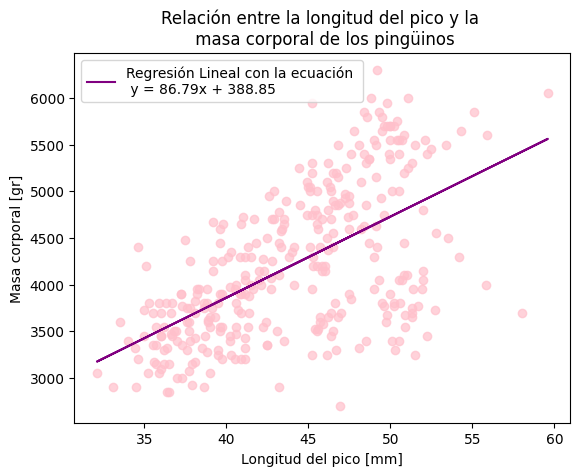

In [8]:
#@title 4. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos?

'''
Para ver la relación entre un conjunto de datos hay varios métodos, sin
embargo el más sencillo para mí es visualizar los datos en un gráfico de
dipersión y ver si los puedo ajustar a una recta.
El ajuste lineal lo hago utilizando la función polyfit de numpy
y la gráfica de dispersión usando la función scatter de matplotlib
'''

#Ajuste lineal para sacar la pendiente y el intersecto de la recta de ajuste de los datos
m, b = np.polyfit(df2['bill_length_mm'], df2['body_mass_g'], 1)

#Creación del gráfico
plt.title("Relación entre la longitud del pico y la \n masa corporal de los pingüinos")
plt.plot(df2['bill_length_mm'], m*df2['bill_length_mm'] + b, color='purple', label=f'Regresión Lineal con la ecuación \n y = {round(m,2)}x + {round(b,2)}')
plt.scatter(df2['bill_length_mm'], df2['body_mass_g'], alpha=0.7, color = "pink")
plt.xlabel("Longitud del pico [mm]")
plt.ylabel("Masa corporal [gr]")
plt.legend()
plt.show() #La relación si es aproximadamente lineal

In [9]:
#@title 5. ¿Cuál es la isla con mayor número de pingüinos en el dataset?
'''
Primero agrupo los pingüinos por la isla de la que vienen,
luego uso count para contar el número de pinguinos en la isla y luego busco
en cual especie es mayor ese número con idmax que busca el id de la fila donde ocurre el
número máximo
'''
pinguinos_islas = df2.groupby("island")
print(f'La isla con mayor número de pinguinos es: {(pinguinos_islas["species"].count()).idxmax()}')

La isla con mayor número de pinguinos es: Biscoe


In [10]:
#@title 6. ¿Cuál es la desviación estándar de la longitud de la aleta de los pingüinos de la especie Chinstrap?
'''
Como ya tengo una variable con el dataframe agrupado por especies,
lo único que debo hacer es luego ver solo la columna con la longitud de la aleta,
sacarle la desviación estándar con .std() y luego usar el .loc
para ver solo a la especie deseada
'''
print(f'La desviación estándar de la longitud de la aleta de los pingüinos de la especie Chinstrap es {(pinguinos_especies["flipper_length_mm"].std()).loc["Chinstrap"]} mm')

La desviación estándar de la longitud de la aleta de los pingüinos de la especie Chinstrap es 7.1318942585781455 mm


In [11]:
#@title 7. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?
'''
Para sacar el mayor número de una columna uso .max()
y para sacar su id uso idmax() y con el busco a que especie
 corresponde ese id
'''
print(f'La longitud más largo del pico en el dataset es {df2["bill_length_mm"].max()} mm y se da en la especie  {df2.loc[df["bill_length_mm"].idxmax()]["species"]}')

La longitud más largo del pico en el dataset es 59.6 mm y se da en la especie  Gentoo


In [12]:
#@title 8. ¿Cuál es la proporción de machos y hembras en la especie Adelie?

Adelie = (df2.loc[df2['species'] == 'Adelie']) #Sacar solo los pingüinos de la especie Adelie
Adelie_sexos = Adelie.groupby("sex").count() #Agrupar los pingüinos de la especie Adelie por sexo y contar cuantos hay de cada sexo
hembras = (Adelie_sexos).loc['Female']['species'] #Sacar cuantas hembras hay
machos = (Adelie_sexos).loc['Male']['species'] #Sacar cuantos machos hay
print(f"Proporción de machos/hembras: {machos/hembras}")


Proporción de machos/hembras: 1.0


In [13]:
#@title 9. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

# Calcular la correlación para cada especie
'''
La correlación de cada columna de un dataframe con la otra se puede sacar con .corr()
pero yo solo quiero la correlacion entre el largo del pico y
la masa corporal, de modo que uso mi tabla agrupada por especies,
la filtro para que solo me deje las columnas numericas porque las columnas
de string me sacan error si intento sacar la correlación, y luego
encuentro la correlación. Finalmente busco donde está la fila y columna
con la correlación entre longitud de pico y masa para todas las especies
'''

correlaciones = pinguinos_especies.apply(lambda x: x.select_dtypes(include='number').corr())

print('Las correlaciones entre la longitud del pico y la masa corporal para cada especie son: ')
correlaciones.loc[:, 'bill_length_mm'][:,'body_mass_g']
#Las correlaciones NO son cercanas ni a 1 ni a -1, significa que la correlación es baja


Las correlaciones entre la longitud del pico y la masa corporal para cada especie son: 


,bill_length_mm
species,
Adelie,0.544276
Chinstrap,0.513638
Gentoo,0.666730


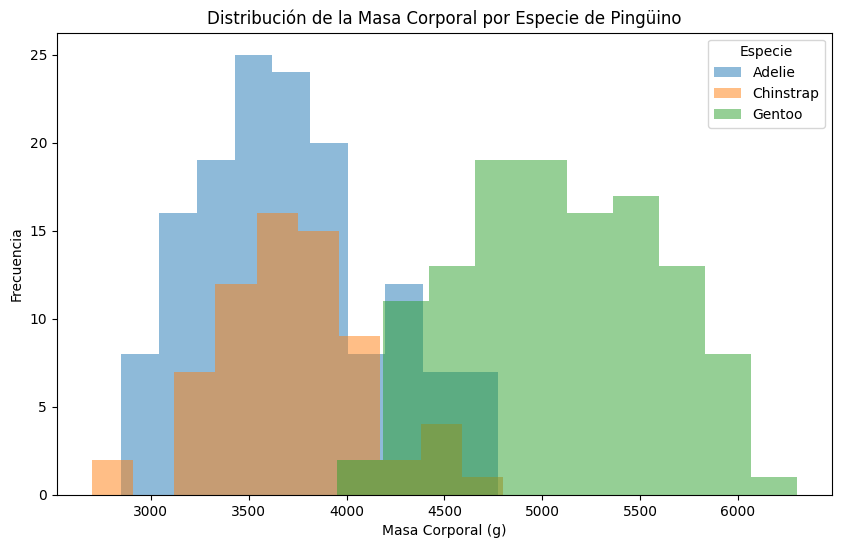

'\nDel gráfico se puede ver que los Adelie son los pingüinos con masas\nmás bajas y los Gentoos con mayores masas\n'

In [21]:
#@title 10. ¿Cuál es la distribución de la masa corporal entre las especies de pingüinos?
import matplotlib.pyplot as plt

'''
Vamos a hacer un histograma de masas corporales por especie de pingüino.
Esto lo hacemos por medio de  un ciclo for, en este ciclo tomamos cada
una de las especies contenidas en el .unique(),
luego creamos un subset de cada especie, es decir un
"dataframe" nuevo solo con dicha especie y finalmente, hacemos
un histograma de sus masas.

'''
# Crear el histograma para cada especie
plt.figure(figsize=(10, 6))

for especie in especies:
    subset = df2[df2['species'] == especie]
    plt.hist(subset['body_mass_g'], alpha=0.5, label= especie)

# Título y etiquetas
plt.title('Distribución de la Masa Corporal por Especie de Pingüino')
plt.xlabel('Masa Corporal (g)')
plt.ylabel('Frecuencia')

# Mostrar leyenda y gráfico
plt.legend(title="Especie")
plt.show()

'''
Del gráfico se puede ver que los Adelie son los pingüinos con masas
más bajas y los Gentoos con mayores masas
'''

In [20]:
#@title 11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?
for especie in especies:
  print(f"La longitud máxima de la aleta de la especie {especie} es {df.loc[df['species'] == especie]['flipper_length_mm'].max()} mm")
  print(f"La longitud mínima de la aleta de la especie {especie} es {df.loc[df['species'] == especie]['flipper_length_mm'].min()} mm")


print(f'La longitud de pico máxima de todas es de {df["flipper_length_mm"].max()} mm, y se da en la especie {df.loc[df["flipper_length_mm"].idxmax()]["species"]}')
print(f'La longitud de pico mínima de todas es de {df["flipper_length_mm"].min()} mm, y se da en la especie {df.loc[df["flipper_length_mm"].idxmin()]["species"]}')


La longitud máxima de la aleta de la especie Adelie es 210.0 mm
La longitud mínima de la aleta de la especie Adelie es 172.0 mm
La longitud máxima de la aleta de la especie Chinstrap es 212.0 mm
La longitud mínima de la aleta de la especie Chinstrap es 178.0 mm
La longitud máxima de la aleta de la especie Gentoo es 231.0 mm
La longitud mínima de la aleta de la especie Gentoo es 203.0 mm
La longitud de pico máxima de todas es de 231.0 mm, y se da en la especie Gentoo
La longitud de pico mínima de todas es de 172.0 mm, y se da en la especie Adelie


In [16]:
#@title 12. ¿Cuántos pingüinos tienen una masa corporal superior a 5000 gramos?

'''
Para sacar cuantos pingüinos superan este límite de masa, vamos a definir un contador
en el que sumaremos los pingüinos que superan esta masa. Recorreremos todas las masas
del arreglo con un for y con un if hacemos la evaluación
'''
c = 0
for i in df2['body_mass_g']:
  if i>= 5000:
    c = c + 1


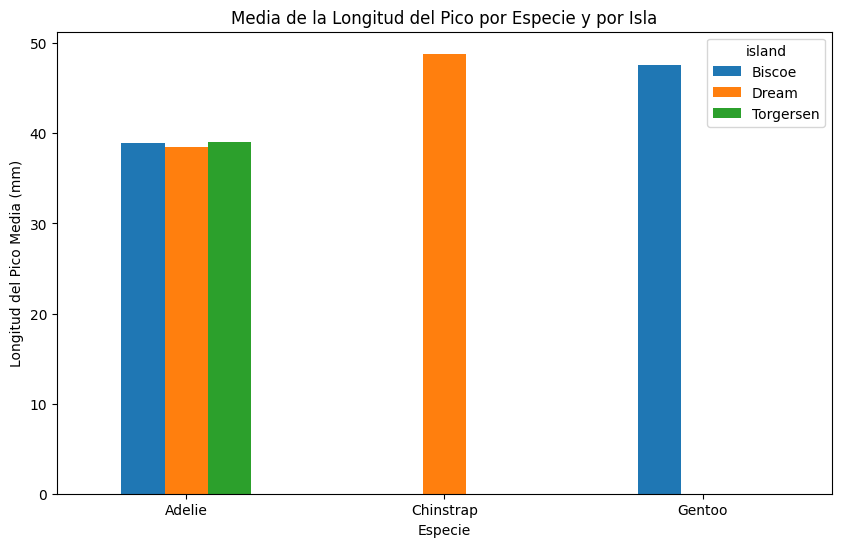

In [19]:
#@title 13. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?
'''
Para ver la variación de la longitud del pico en las diferentes especies vamos
a utilizar gráficos de barras que nos muestren cual es la media en promedio de la
longitud del pico de cada pingüino en cada una de las islas. Para esto agrupo tanto
por especie como por isla, luego saco la media y uso el unstack para dejar los subgrupos agrupados
Luego se hacen los gráficos de barra respectivos.
'''
# Calcular la media de la longitud del pico
media_longitud_pico = df2.groupby(['species', 'island'])['bill_length_mm'].mean().unstack()

# Crear el gráfico de barras
media_longitud_pico.plot(kind='bar', figsize=(10, 6))

plt.title('Media de la Longitud del Pico por Especie y por Isla')
plt.xlabel('Especie')
plt.ylabel('Longitud del Pico Media (mm)')
plt.xticks(rotation=0)
plt.show()

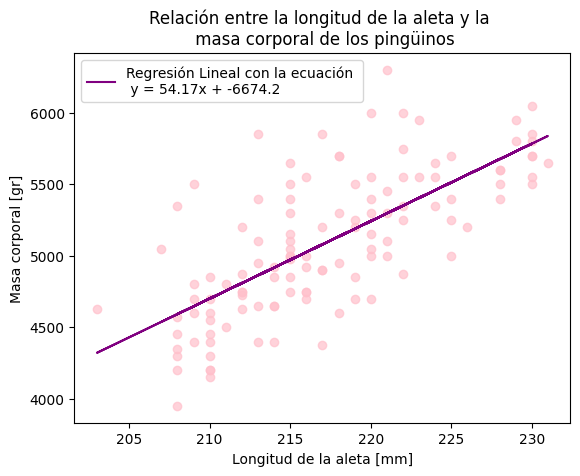

In [26]:
#@title 14. ¿Cuál es la relación entre la longitud de la aleta y la masa corporal en los pingüinos de la especie Gentoo?

'''
 El desarrollo de este punto es análogo al del punto 4
'''

gentoo_df = df2.loc[df2['species'] == 'Gentoo']

gentoo_df = gentoo_df.dropna(subset=['flipper_length_mm', 'body_mass_g'])
m, b = np.polyfit(gentoo_df['flipper_length_mm'], gentoo_df['body_mass_g'], 1)

#Creación del gráfico
plt.title("Relación entre la longitud de la aleta y la \n masa corporal de los pingüinos")
plt.plot(gentoo_df['flipper_length_mm'], m*gentoo_df['flipper_length_mm'] + b, color='purple', label=f'Regresión Lineal con la ecuación \n y = {round(m,2)}x + {round(b,2)}')
plt.scatter(gentoo_df['flipper_length_mm'], gentoo_df['body_mass_g'], color = 'pink', alpha=0.7)
plt.xlabel("Longitud de la aleta [mm]")
plt.ylabel("Masa corporal [gr]")
plt.legend()
plt.show() #La relación si es aproximadamente lineal

plt.show()

In [30]:
#@title 15. ¿Cuántos pingüinos tienen datos faltantes en alguna de sus características?
'''
Buscar en cuantas filas, alguna columna tiene algún valor nulo
'''
print(f'{(df.isnull().any(axis = 1)).sum()} pingüinos tienen alguna característica faltante')

11 pingüinos tienen alguna característica faltante


In [34]:
#@title 16. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?
'''
La variación de un valor se mide con su desviación estándar; de esta forma, como ya tenemos agrupados los pingüinos por isla,
ahora lo que hacemos es calcularle su desviación estándar y con idxmax() encontramos a que especie de pingüino corresponde.
'''
print(f'La isla {pinguinos_islas["bill_length_mm"].std().idxmax()} es la que tiene la mayor variación en la longitud del pico entre las 3 especies de pingüinos')

La isla Dream es la que tiene la mayor variación en la longitud del pico entre las 3 especies de pingüinos


In [35]:
#@title 17. ¿Cuál es la diferencia en masa corporal promedio entre machos y hembras de la especie Chinstrap?

'''
Usamos .loc para sacar solamente los pingüinos de la especie Chinstrap, luego los
agrupo por sexo y saco la media de su masa corporal y selecciono únicamente dicha columna,
luego de esa tabla extraigo el promedio para las hembras y para los machos y finalmente hago
la resta entre ellos.
'''
Chinstrap = df2.loc[df2['species'] == 'Chinstrap']

sex_chinstrap_body = Chinstrap.groupby("sex").mean("body_mass_g")['body_mass_g']
Fem_prom = sex_chinstrap_body.loc['Female']
Ma_prom = sex_chinstrap_body.loc['Male']
print(f'La diferencia en masa corporal promedio entre machos y hembras de la especie Chinstrap es de {Fem_prom - Ma_prom} gr')

La diferencia en masa corporal promedio entre machos y hembras de la especie Chinstrap es de -411.76470588235316 gr


In [43]:
#@title 18. ¿Qué especie de pingüino tiene la longitud de aleta promedio más alta?

'''
Para hallar la especie con mayor longitud promedio de aleta se toma el dataframe en el que tenemos
agrupado por especie, sacamos la media de la longitud promedio de aleta, seleccionamos solo esta columna,
hallamos el id en el que esta es máxima.
'''
print(f'La especie de pingüino que tiene la mayor longitud promedio de aleta es {pinguinos_especies.mean("flipper_length_mm")["flipper_length_mm"].idxmax()}')

La especie de pingüino que tiene la mayor longitud promedio de aleta es Gentoo


In [46]:
#@title 19. ¿Cuál es la longitud del pico más pequeña registrada en el dataset y de qué especie es?
'''
Para esto simplemente buscamos el mínimo en la columna de longitud de aleta y buscamos a que pingüino pertenece
'''
(f' La longitud del pico más pequeña registrada en el dataset es de {df2["bill_length_mm"].min()} mm y es de la especie {df2.loc[df2["bill_length_mm"].idxmin()]["species"]}')

' La longitud del pico más pequeña registrada en el dataset es de 32.1 mm y es de la especie Adelie'

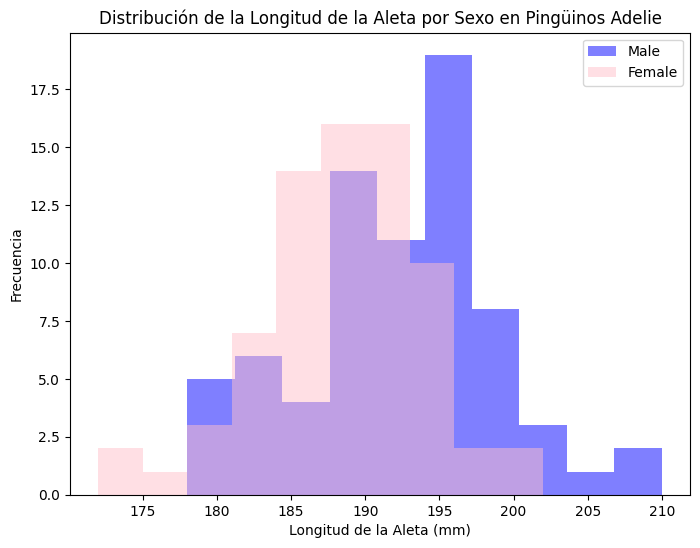

In [50]:
#@title 20. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos de la especie Adelie?

'''
Para estudiar la relación entre el sexo y la longitud de la aleta en los pingüinos
de la especie Adelie, lo que se hace es filtrar el dataframe para que solo aparezcan
los pingüinos de dicha especie, luego en este dataframe se filtra por sexo en masculino
y femenino y la columna de longitud de la aleta y se grafica esto en dos histogramas,
uno por cada sexo.
'''

adelie_df = df2[df2['species'] == 'Adelie']

# Crear el histograma superpuesto para machos y hembras
plt.figure(figsize=(8, 6))

plt.hist(adelie_df[adelie_df['sex'] == 'Male']['flipper_length_mm'], alpha=0.5, label='Male', color='blue')
plt.hist(adelie_df[adelie_df['sex'] == 'Female']['flipper_length_mm'], alpha=0.5, label='Female', color='pink')

plt.title('Distribución de la Longitud de la Aleta por Sexo en Pingüinos Adelie')
plt.xlabel('Longitud de la Aleta (mm)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()